# WeatherPy
----


## Observable Trends

It is estimated that 68% of the Earth’s land mass is located in the Northern Hemisphere, while the rest (32%) exists in the Southern Hemisphere. This fact together with opposite seasonal patterns will impact our results.

* As it is expected, around the equator temperatures are higher than south or north of it. At least at this time of the year, temperatures are decreasing faster north of the equator. There is very strong negative correlation between latitude and maximum temperatures in the Northern Hemisphere. In the Southern Hemisphere the similar relationship exists but it is a little bit weaker. Slightly lower correlation on Southern Hemisphere could be explained by less land mass than on the opposite side.


* There are a little bit more cities with lower humidity on latitudes between 20 and 40 degrees. Majority of cities south of the equator have humidity above 60%. Correlation between latitude and humidity is weak in both hemispheres.


* Wind speeds of up to 15 mph are almost equaly spread. Some places with speeds above 25 mph are found at latitudes below -40 degrees and above 40 degrees. Correlation between latitude and wind speed is weak in both hemispheres.


* Correlation between latitude and cloudiness is very weak in both hemispheres.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
cities_df = pd.DataFrame(cities, columns=['City'])

cities_df.head()

,City
0,dikson
1,mahebourg
2,pangobilian
3,kutum
4,vaini


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Add columns for Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, and Wind Speed
new_cols = ['Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed' ]

for col in new_cols:
    cities_df[col] = ""
    
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,,,,,,,,
1,mahebourg,,,,,,,,
2,pangobilian,,,,,,,,
3,kutum,,,,,,,,
4,vaini,,,,,,,,


In [5]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        620 non-null    object
 1   Cloudiness  620 non-null    object
 2   Country     620 non-null    object
 3   Date        620 non-null    object
 4   Humidity    620 non-null    object
 5   Lat         620 non-null    object
 6   Lng         620 non-null    object
 7   Max Temp    620 non-null    object
 8   Wind Speed  620 non-null    object
dtypes: object(9)
memory usage: 43.7+ KB


In [6]:
# Retriving data

# Set base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set paramteres for data retrieval
params = {'units': 'imperial',
          'appid': weather_api_key}

# Set temperature units for plots
if params['units'] == 'imperial': 
    tunit = 'F'
elif params['units'] == 'metric':
    tunit = 'C'
else:
    tunit = 'K'

# print title of retrieval log
print('Beginning Data Retrieval')
print('-----------------------------')

# time to sleep betwen 2 sets in seconds
wait = 60
# number of records in a set
max_rec = 50

# initialize set and record
set = 1
record = 0

# Loop
for index, row in cities_df.iterrows():
    # update address key value
    city = row['City']
    params['q'] = city
        
    # count sets and records, sleep after each set
    record += 1
    print(f"Processing Record {record} of Set {set} | {city}")
    if record == max_rec:
        record = 0
        set += 1
        time.sleep(wait)
    
    # make request
    cities_rq = requests.get(base_url, params).json()
    
    # use a try-except to skip any data that are missing a data point
    try:
        cities_df.loc[index, 'Cloudiness'] = cities_rq['clouds']['all']
        cities_df.loc[index, 'Country'] = cities_rq['sys']['country']
        cities_df.loc[index, 'Date'] = cities_rq['dt']
        cities_df.loc[index, 'Humidity'] = cities_rq['main']['humidity']
        cities_df.loc[index, 'Lat'] = cities_rq['coord']['lat']
        cities_df.loc[index, 'Lng'] = cities_rq['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = cities_rq['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = cities_rq['wind']['speed']
    except (KeyError, IndexError):
        cities_df.drop(index, inplace=True)
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')

cities_df.reset_index(drop=True, inplace=True)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | pangobilian
Processing Record 4 of Set 1 | kutum
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | soyo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | fort saint james
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | santa isabel
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | lebu
Pr

Processing Record 40 of Set 4 | daur
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | menongue
Processing Record 43 of Set 4 | taburi
City not found. Skipping...
Processing Record 44 of Set 4 | shingu
Processing Record 45 of Set 4 | tahe
Processing Record 46 of Set 4 | rio cuarto
Processing Record 47 of Set 4 | meulaboh
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | najran
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | stepanov
Processing Record 2 of Set 5 | jabiru
City not found. Skipping...
Processing Record 3 of Set 5 | edeia
Processing Record 4 of Set 5 | tipp city
Processing Record 5 of Set 5 | portalegre
Processing Record 6 of Set 5 | acarau
Processing Record 7 of Set 5 | jiuquan
Processing Record 8 of Set 5 | pangai
Processing Record 9 of Set 5 | vestbygda
City not found. Skipping...
Processing Record 10 of Set 5 | agadez
Processing Record 11 of Set 5 | luanda
Processing Record 12 of Set 5 | los llanos d

Processing Record 27 of Set 8 | hudson bay
Processing Record 28 of Set 8 | shelabolikha
Processing Record 29 of Set 8 | severo-kurilsk
Processing Record 30 of Set 8 | sivas
Processing Record 31 of Set 8 | caxito
Processing Record 32 of Set 8 | semnan
Processing Record 33 of Set 8 | caohai
Processing Record 34 of Set 8 | baykit
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | tendukheda
Processing Record 37 of Set 8 | loandjili
Processing Record 38 of Set 8 | umm kaddadah
Processing Record 39 of Set 8 | quatre cocos
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | flin flon
Processing Record 42 of Set 8 | saurimo
Processing Record 43 of Set 8 | beni suef
Processing Record 44 of Set 8 | roebourne
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 47 of Set 8 | zhangye
Processing Record 48 of Set 8 | sangamner
Processing Record 49 of Set 8 | nanortalik
Proces

Processing Record 15 of Set 12 | voh
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | sillod
Processing Record 18 of Set 12 | malibu
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | mizdah
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | pithora
Processing Record 24 of Set 12 | harwich
Processing Record 25 of Set 12 | kannur
Processing Record 26 of Set 12 | keti bandar
Processing Record 27 of Set 12 | parrita
Processing Record 28 of Set 12 | halifax
Processing Record 29 of Set 12 | waingapu
Processing Record 30 of Set 12 | santa cruz de tenerife
Processing Record 31 of Set 12 | port keats
Processing Record 32 of Set 12 | sydney mines
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | wajid
Processing Record 35 of Set 12 | gat
Processing Record 36 of Set 12 | marshalltown
Processing Record 37 of Set 12 | port blair
Processing Record 38 of Set 12 | ne

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Display dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,98,RU,1586555403,96,73.51,80.55,12.51,7.74
1,mahebourg,75,MU,1586554883,78,-20.41,57.7,79,13.87
2,pangobilian,29,PH,1586555403,76,8.8,117.86,79.65,4.47
3,kutum,0,SD,1586555404,14,14.2,24.67,71.33,9.82
4,vaini,40,TO,1586555404,69,-21.2,-175.2,78.8,8.05


In [8]:
# Export dataframe to csv file
cities_df.to_csv('../output_data/cities.csv', index=False)

In [9]:
# Check counts
cities_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [10]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        567 non-null    object
 1   Cloudiness  567 non-null    object
 2   Country     567 non-null    object
 3   Date        567 non-null    object
 4   Humidity    567 non-null    object
 5   Lat         567 non-null    object
 6   Lng         567 non-null    object
 7   Max Temp    567 non-null    object
 8   Wind Speed  567 non-null    object
dtypes: object(9)
memory usage: 40.0+ KB


In [11]:
# Format output
cities_df.iloc[:, 5:] = cities_df.iloc[:, 5:].applymap('{:.2f}'.format)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,98,RU,1586555403,96,73.51,80.55,12.51,7.74
1,mahebourg,75,MU,1586554883,78,-20.41,57.70,79.00,13.87
2,pangobilian,29,PH,1586555403,76,8.80,117.86,79.65,4.47
3,kutum,0,SD,1586555404,14,14.20,24.67,71.33,9.82
4,vaini,40,TO,1586555404,69,-21.20,-175.20,78.80,8.05


In [12]:
# Set dictionary to change types from object to int and float
type_dict = {'Cloudiness': 'int64',
             'Humidity': 'int64',
             'Date': 'int64',
             'Lat': 'float',
             'Lng': 'float',
             'Max Temp': 'float',
             'Wind Speed': 'float'
            }

# Apply new types to dataframe
cities_df = cities_df.astype(type_dict)

In [13]:
cities_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
# Calculate latest date (max) for plot titles
tstamp = cities_df.Date.max()

# Convert Unix timestamp to formated date
fdate= time.strftime("%m/%d/%y",time.localtime(tstamp))
fdate

'04/10/20'

#### Latitude vs. Temperature Plot

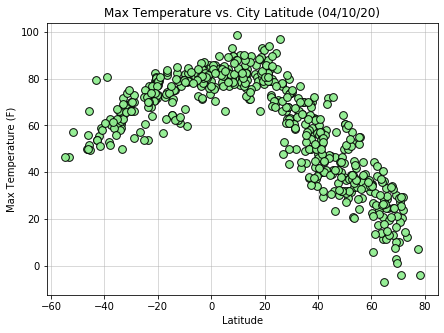

In [15]:
# Generate scatter plot
Y = cities_df.columns[7]

fig, ax = plt.subplots(figsize=(7, 5))
cities_df.plot(kind='scatter', 
                 x='Lat', 
                 y=Y,
                 color='lightgreen', 
                 edgecolors='black',
                 alpha=0.95,
                 s=60,
                 ax=ax)

# Set text properties
ax.set_title(f'Max Temperature vs. City Latitude ({fdate})')
ax.set_xlabel('Latitude')
ax.set_ylabel(f'Max Temperature ({tunit})')

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

# Save as .png file and display    
png_name = f"../Images/Sct_1 - {Y} vs. Latitude.png"
plt.savefig(png_name)

<code style="color:blue">Around equator temperatures are higher than south or north of it. At least at this time of the year temperatures are decreasing faster north of the equator. As we could expect from the land mass distribution, there are more cities above 60 degrees and none below -60 degrees. </code>

#### Latitude vs. Humidity Plot

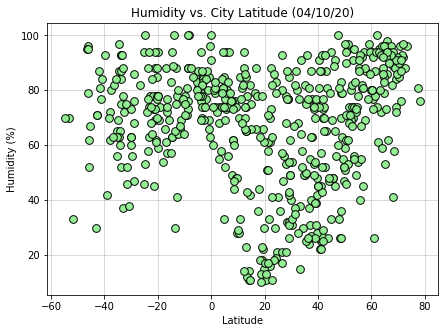

In [16]:
# Generate scatter plot
Y = cities_df.columns[4]

fig, ax = plt.subplots(figsize=(7, 5))
cities_df.plot(kind='scatter', 
                 x='Lat', 
                 y=Y,
                 color='lightgreen', 
                 edgecolors='black',
                 alpha=0.95,
                 s=60,
                 ax=ax)

# Set text properties
ax.set_title(f'{Y} vs. City Latitude ({fdate})')
ax.set_xlabel('Latitude')
ax.set_ylabel(f'{Y} (%)')

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

# Save as .png file and display    
png_name = f"../Images/Sct_2 - {Y} vs. Latitude.png"
plt.savefig(png_name)

<code style="color:blue">We can see a little bit more cities with lower humidity on latitudes between 20 and 40 degrees. Majority of cities south of the equator have humidity above 60%.</code>

#### Latitude vs. Cloudiness Plot

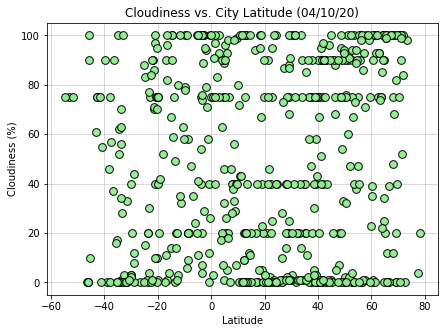

In [17]:
# Generate scatter plot
Y = cities_df.columns[1]

fig, ax = plt.subplots(figsize=(7, 5))
cities_df.plot(kind='scatter', 
                 x='Lat', 
                 y=Y,
                 color='lightgreen', 
                 edgecolors='black',
                 alpha=0.95,
                 s=60,
                 ax=ax)

# Set text properties
ax.set_title(f'{Y} vs. City Latitude ({fdate})')
ax.set_xlabel('Latitude')
ax.set_ylabel(f'{Y} (%)')

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

# Save as .png file and display    
png_name = f"../Images/Sct_3 - {Y} vs. Latitude.png"
plt.savefig(png_name)

<code style="color:blue">At all latitudes we can see cloudiness between 0% and 100%.</code>

#### Latitude vs. Wind Speed Plot

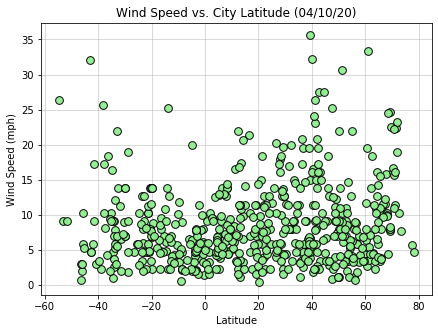

In [18]:
# Generate scatter plot
Y = cities_df.columns[8]

fig, ax = plt.subplots(figsize=(7, 5))
cities_df.plot(kind='scatter', 
                 x='Lat', 
                 y=Y,
                 color='lightgreen', 
                 edgecolors='black',
                 alpha=0.95,
                 s=60,
                 ax=ax)

# Set text properties
ax.set_title(f'{Y} vs. City Latitude ({fdate})')
ax.set_xlabel('Latitude')
ax.set_ylabel(f'{Y} (mph)')

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

# Save as .png file and display    
png_name = f"../Images/Sct_4 - {Y} vs. Latitude.png"
plt.savefig(png_name)

<code style="color:blue">Wind speeds of up to 15 mph are almost equally spread. Some places with speeds above 25 mph are found at latitudes below -40 degrees and above 40 degrees.</code>

## Linear Regression

In [19]:
# Function to create Linear Regression plots

def plot_f(df, hem, Y, xy_point, unit="",pltn=''):
    '''
    df - dataframe name
    hem - hemisphere ( North, South)
    Y - dataframe column used for y axis
    xy_point - starting point for annotation of lin. reg. equation
    unit - used for completing plot labels and title 
            (%), (F), (mph) - default is empty string
    pltn - plot number (1,2,..) - default is empty string
    '''

    x_axis = df.Lat
    y_axis = df[Y]

    # Perform a linear regression on 
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    regression = slope * x_axis + intercept

    # Create linear regression equation
    lreg_eq = 'y = ' + str(round(slope,2)) + 'x + '  + str(round(intercept,2))

    # Generate scatter plot
    fig, ax = plt.subplots(figsize=(7, 5))
    df.plot(kind='scatter', 
                     x='Lat', 
                     y=Y,           
                     color='lightgreen', 
                     edgecolors='black',
                     alpha=0.95,
                     s=60,
                     ax=ax)

    # Add linear regression line to plot
    ax.plot(x_axis, regression, '-', c='r', linewidth=1.5)
    # Add linear regression equation to plot
    plt.annotate(lreg_eq,xy_point,fontsize=15, color='b')

    # Set text properties
    ax.set_title(f'{hem}ern Hemisphere \n{Y} {unit} vs. Latitude - Linear Regression')
    ax.set_xlabel('Latitude')
    ax.set_ylabel(f'{Y} {unit}')

    # set grid for both axis
    ax.set_axisbelow(True)
    ax.grid(alpha=0.6)

    print(f"\nCorrelation Coefficient is: {r_value}\nThe r-squared is: {r_value**2}")

    # Save as .png file and display
    png_name = f"../Images/LR_{pltn} - {hem} - {Y} vs. Latitude.png"
    plt.savefig(png_name)
    
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere dataFrames
north_df = cities_df.loc[cities_df.Lat >= 0].reset_index(drop=True)
print(north_df.shape)
display(north_df.head())

south_df = cities_df[cities_df.Lat < 0].reset_index(drop=True)
print(south_df.shape)
south_df.head()

(391, 9)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dikson,98,RU,1586555403,96,73.51,80.55,12.51,7.74
1,pangobilian,29,PH,1586555403,76,8.80,117.86,79.65,4.47
2,kutum,0,SD,1586555404,14,14.20,24.67,71.33,9.82
3,fort saint james,38,CA,1586555405,49,54.43,-124.25,41.90,5.21
4,kodiak,1,US,1586555405,69,57.79,-152.41,39.20,6.93


(176, 9)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mahebourg,75,MU,1586554883,78,-20.41,57.70,79.0,13.87
1,vaini,40,TO,1586555404,69,-21.20,-175.20,78.8,8.05
2,bredasdorp,62,ZA,1586554881,87,-34.53,20.04,59.0,4.70
3,port alfred,63,ZA,1586555404,84,-33.59,26.89,66.0,5.28
4,punta arenas,75,CL,1586555404,70,-53.15,-70.92,46.4,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


Correlation Coefficient is: -0.9069330050352183
The r-squared is: 0.8225274756222114


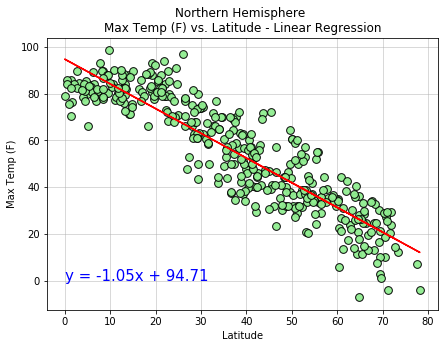

In [21]:
plot_f(north_df, 'North', 'Max Temp', (0, 0), f'({tunit})', 1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


Correlation Coefficient is: 0.7629387864150637
The r-squared is: 0.5820755918164903


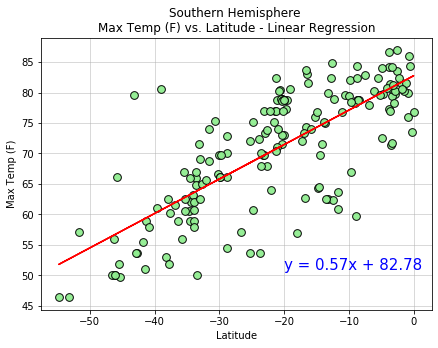

In [22]:
plot_f(south_df, 'South', 'Max Temp', (-20, 51), f'({tunit})', 2)

<code style="color:blue">There is very strong negative correlation between latitude and max. temperatures in the Northern Hemisphere. In the Southern Hemisphere the similar relationship exists but it is a little bit weaker. Cities are further from the regression line. As we could expect, in both hemispheres, temperatures are decreasing as we are going towards poles. Slightly lower correlation in the Southern Hemisphere could be explained by less land mass than on the opposite side. We can see impact of opposite seasons as well: cities at -35 degrees have temperature around 65 F and at +35 degrees the temperature is below 60F.</code>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


Correlation Coefficient is: 0.3036056226064423
The r-squared is: 0.09217637407824547


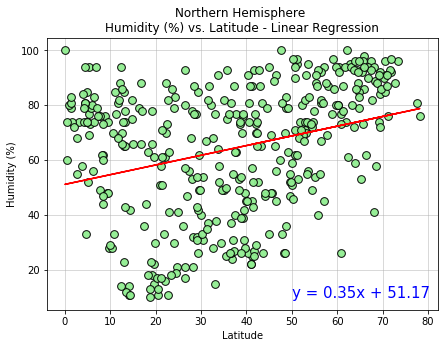

In [23]:
plot_f(north_df, 'North', 'Humidity', (50, 10), '(%)', 3)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


Correlation Coefficient is: 0.21494794330092667
The r-squared is: 0.04620261832929839


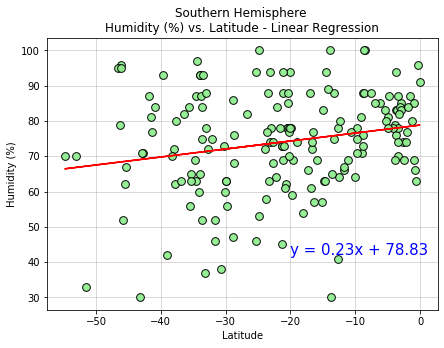

In [24]:
plot_f(south_df, 'South', 'Humidity', (-20, 42), '(%)', 4)

<code style="color:blue">Very weak correlation in both hemispheres. In the Northern Hemisphere most cities at northern latitudes (50 degrees and above) have humidity above 80%. But on the Southern Hemisphere it is slightly more humid closer to the equator.</code>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


Correlation Coefficient is: 0.15720938235091578
The r-squared is: 0.02471478989915643


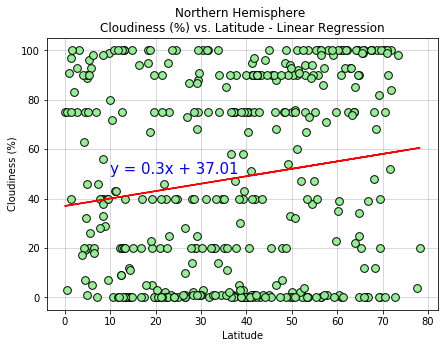

In [26]:
plot_f(north_df, 'North', 'Cloudiness', (10, 50), '(%)', 5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


Correlation Coefficient is: 0.20253152394594184
The r-squared is: 0.04101901819186561


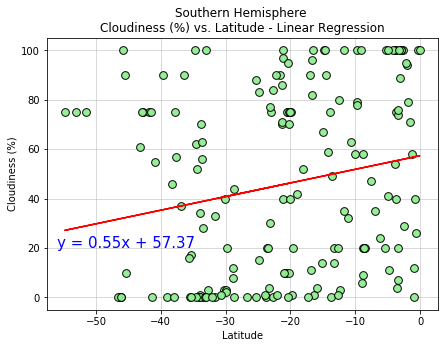

In [29]:
plot_f(south_df, 'South', 'Cloudiness', (-56, 20), '(%)', 6)

<code style="color:blue">Very weak correlation in both hemispheres. In the Northern Hemisphere cloudiness is almost equally spread over all latitudes. In the Southern Hemisphere there is very similar relationship.</code>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


Correlation Coefficient is: 0.13221694100543138
The r-squared is: 0.017481319488833722


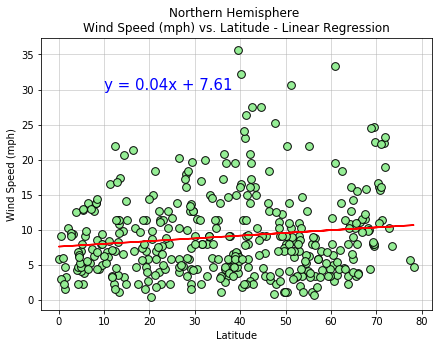

In [30]:
plot_f(north_df, 'North', 'Wind Speed', (10, 30), '(mph)', 7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


Correlation Coefficient is: -0.25245712931199543
The r-squared is: 0.06373460214045358


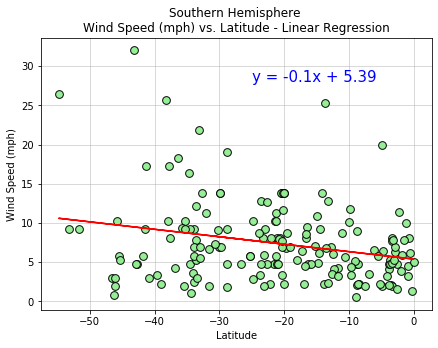

In [32]:
plot_f(south_df, 'South', 'Wind Speed', (-25, 28), '(mph)', 8)

<code style="color:blue">Very weak correlation in both hemispheres. In the Northern Hemisphere most of the wind speeds are below 15 mph with some outliers at northern latitudes. In the Southern Hemisphere most of the wind speeds are below 15 mph with several outliers.